In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk
import spacy

In [2]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [3]:
df=pd.read_csv('/content/spotify_reviews.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84165 entries, 0 to 84164
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              84165 non-null  object
 1   userName              84161 non-null  object
 2   content               84165 non-null  object
 3   score                 84165 non-null  int64 
 4   thumbsUpCount         84165 non-null  int64 
 5   reviewCreatedVersion  78397 non-null  object
 6   at                    84165 non-null  object
 7   appVersion            78397 non-null  object
dtypes: int64(2), object(6)
memory usage: 5.1+ MB


In [5]:
df.isnull().sum()

,0
reviewId,0
userName,4
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,5768
at,0
appVersion,5768


In [6]:
df.shape

(84165, 8)

In [44]:
df=df.iloc[:2000,:]

In [45]:

df.dropna(inplace=True)
df.info()
df.isnull().sum()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2178
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              2000 non-null   object
 1   userName              2000 non-null   object
 2   content               2000 non-null   object
 3   score                 2000 non-null   int64 
 4   thumbsUpCount         2000 non-null   int64 
 5   reviewCreatedVersion  2000 non-null   object
 6   at                    2000 non-null   object
 7   appVersion            2000 non-null   object
dtypes: int64(2), object(6)
memory usage: 140.6+ KB


(2000, 8)

In [46]:
df.shape

(2000, 8)

In [47]:
df.isnull().sum()

,0
reviewId,0
userName,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
appVersion,0


In [48]:
df.describe()

,score,thumbsUpCount
count,2000.000000,2000.000000
mean,2.900500,39.553000
std,1.647713,186.284345
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,12.000000
max,5.000000,3638.000000


In [49]:
df.drop_duplicates(inplace=True)

In [50]:
df.shape

(2000, 8)

In [51]:
df.isnull().sum()

,0
reviewId,0
userName,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
appVersion,0


In [52]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494
5,1c260703-26fb-404c-b7b0-dcbd2f93a415,Mike rangel,Loved it,5,0,8.9.38.494,2024-05-09 16:24:51,8.9.38.494


## **EDA**

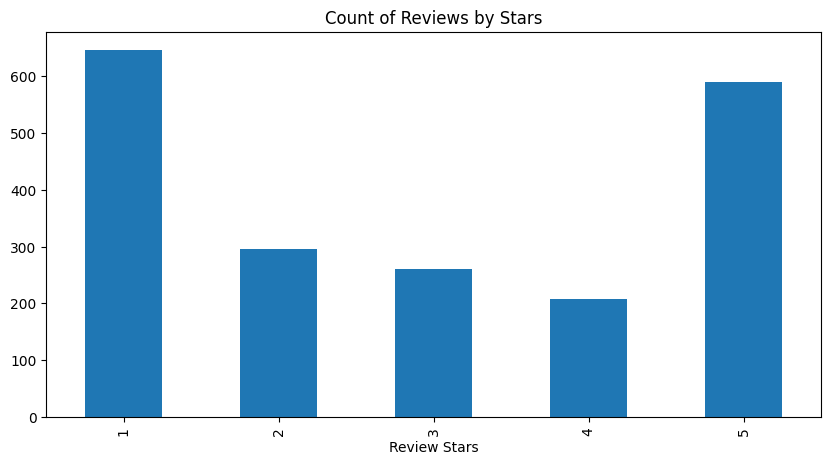

In [53]:
ax = df['score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()


# **Basic Sentiment Analysis Using NLTK**

In [56]:
example = df['content'][507]
print(example)

It's either Spotify premium or nothing


In [57]:
!pip install nltk

In [18]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
 nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [20]:
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

In [21]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [58]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(example)



In [59]:
tokens[:10]


['It', "'s", 'either', 'Spotify', 'premium', 'or', 'nothing']

In [60]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('either', 'CC'),
 ('Spotify', 'NNP'),
 ('premium', 'NN'),
 ('or', 'CC'),
 ('nothing', 'NN')]

In [61]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  It/PRP
  's/VBZ
  either/CC
  (GPE Spotify/NNP)
  premium/NN
  or/CC
  nothing/NN)


In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [62]:
sia.polarity_scores('I am so happy!')


{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [28]:
sia.polarity_scores('This is the worst thing ever.')


{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [63]:
sia.polarity_scores(example)


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [64]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494
5,1c260703-26fb-404c-b7b0-dcbd2f93a415,Mike rangel,Loved it,5,0,8.9.38.494,2024-05-09 16:24:51,8.9.38.494


In [65]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['content']
    myid = row['reviewId']
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/2000 [00:00<?, ?it/s]

In [66]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'reviewId'})
vaders = vaders.merge(df, how='left')

In [67]:
vaders.head()

,reviewId,neg,neu,pos,compound,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,4933ad2c-c70a-4a84-957d-d405439b2e0f,0.095,0.765,0.139,0.3981,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494
1,1ab275fb-59bf-42c7-88ef-b85901f0445e,0.000,0.000,1.000,0.5719,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616
2,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,0.000,0.561,0.439,0.8622,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494
3,7be7999d-4cb6-47b9-8414-d7bdaa9df578,0.000,0.748,0.252,0.4003,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494
4,1c260703-26fb-404c-b7b0-dcbd2f93a415,0.000,0.204,0.796,0.5994,Mike rangel,Loved it,5,0,8.9.38.494,2024-05-09 16:24:51,8.9.38.494


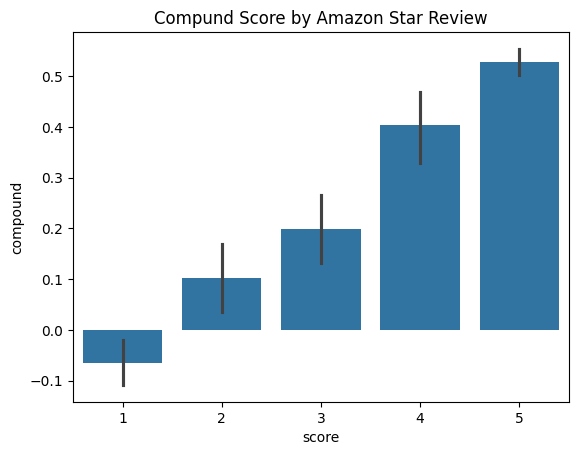

In [68]:
ax = sns.barplot(data=vaders, x='score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

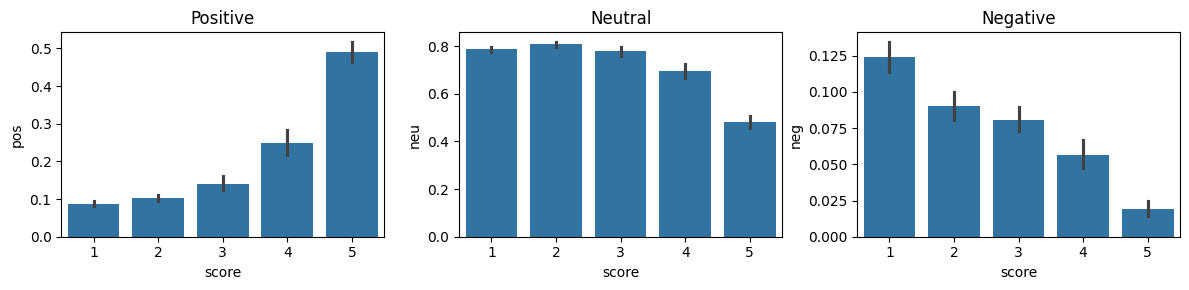

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# **RoberTa Treansformer Model**

In [36]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [37]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [70]:
# VADER results on example
print(example)
sia.polarity_scores(example)

It's either Spotify premium or nothing


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [71]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {

    'roberta_neg' : float(scores[0]),
    'roberta_neu' : float(scores[1]),
    'roberta_pos' : float(scores[2])


}
print(scores_dict)

{'roberta_neg': 0.15941038727760315, 'roberta_neu': 0.7040435671806335, 'roberta_pos': 0.1365460306406021}


In [72]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : float(scores[0]),
        'roberta_neu' : float(scores[1]),
        'roberta_pos' : float(scores[2])
    }
    return scores_dict

In [73]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['content']
        myid = row['reviewId']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/2000 [00:00<?, ?it/s]

In [74]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'reviewId'})
results_df = results_df.merge(df, how='left')

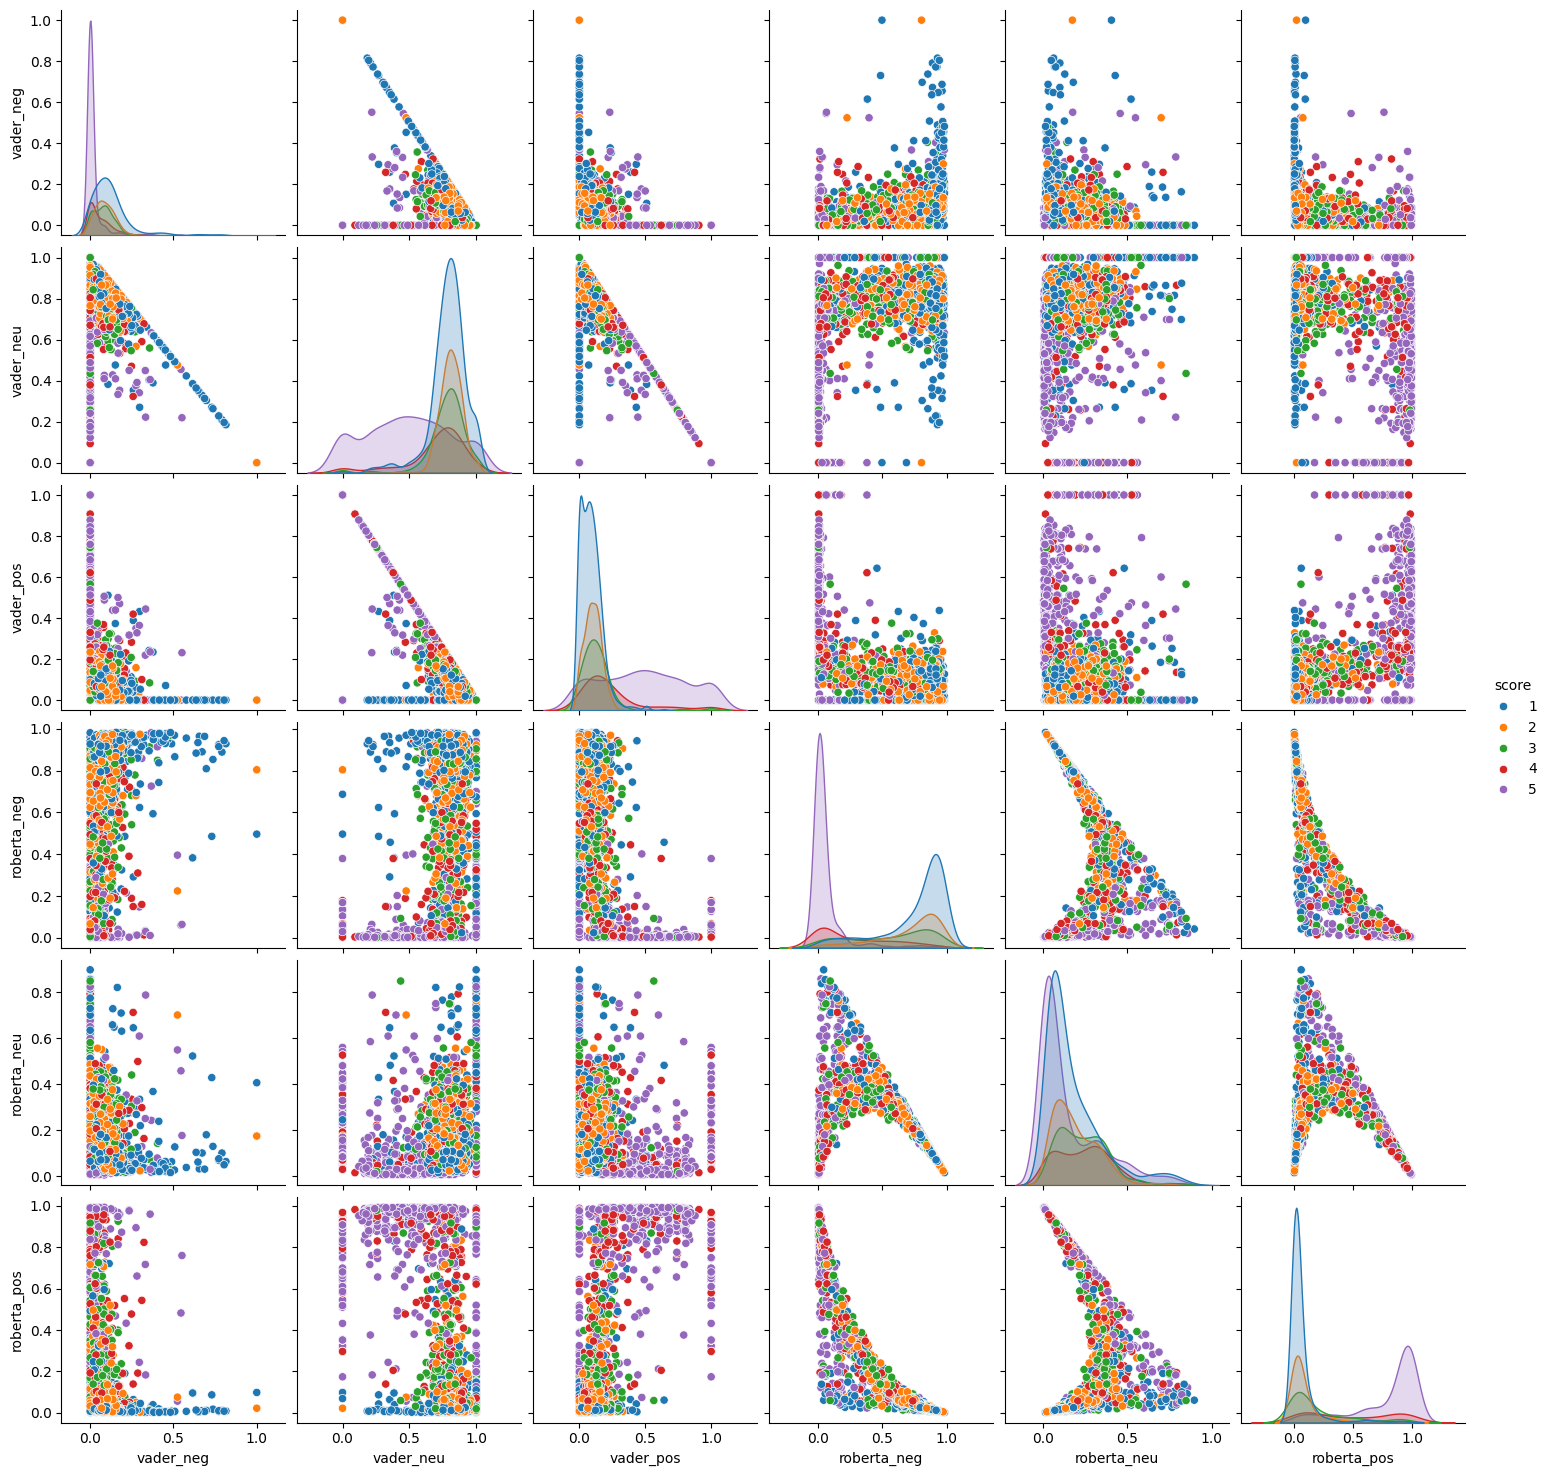

In [76]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='score',
            palette='tab10')
plt.show()

In [78]:
results_df.query('score == 1') \
    .sort_values('roberta_pos', ascending=False)['content'].values[0]

'Brahmo Brahmo awesome music app'

In [80]:
results_df.query('score == 1') \
    .sort_values('vader_pos', ascending=False)['content'].values[0]

'Eat the rich'